<a href="https://colab.research.google.com/github/climate-and-health-datasci-Unicamp/ldl-cholesterol-climate-analysis/blob/master/notebooks/03_LDL_above_average_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authors:**
* [Júlia Perassolli De Lázari](https://github.com/juliaplazari)
* [Thiago Ribas Bella](https://github.com/trbella)

*created in jun/2020*

#LDL level above average

* INPUT: [ldl_waves_lags.csv](https://drive.google.com/file/d/1wKKE6TFeBkbbi6va6MB3pMe6ReGxlNw_/view?usp=sharing)


## Read data

In [35]:
#Import libraries and load data
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import files
from google.colab import auth

#-------------------------------------------------------------------#
#          Load dataframe with cold waves and lags                  #
#-------------------------------------------------------------------#
drive.mount('/content/drive/')
df_shift = pd.read_csv('/content/drive/Shared drives/Clima&Saúde/Dados/Dados_Saude/Clinicos_LMC/LDL/SUBSET/ldl_waves_lags.csv')

print("\n\nLenght of dataframe:",len(df_shift),'\n')
df_shift.columns

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Lenght of dataframe: 980046 



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'DATE', 'Result', 'Age', 'Age group', 'Sex', 'below_pct',
       'CW', 'cwave', 'ci', 'cf', 'above_pct', 'HW', 'hwave', 'hi', 'hf',
       'bool', 'CI_lag0', 'HI_lag0', 'CI_lag1', 'HI_lag1', 'CI_lag2',
       'HI_lag2', 'CI_lag3', 'HI_lag3', 'CI_lag4', 'HI_lag4', 'CI_lag5',
       'HI_lag5', 'CI_lag6', 'HI_lag6', 'CI_lag7', 'HI_lag7', 'CI_lag8',
       'HI_lag8', 'CI_lag9', 'HI_lag9', 'CI_lag10', 'HI_lag10'],
      dtype='object')

## Outlier removal

In [36]:
#@title Remove data from extremes 5% and 95%
#remove outliers - data from extremes 5% and 95%

df_shift = df_shift[(df_shift['Result']<=df_shift['Result'].quantile(.95))&(df_shift['Result']>=df_shift['Result'].quantile(.05))]
print("After removing the 5% and 95% extremes we have",len(df_shift),"rows")                                          

After removing the 5% and 95% extremes we have 884246 rows


## Age and sex stratification


In [37]:
#@title create subsets for stratification

#create subsets
print('stratified subsets and its sample size\n')
under_20_F = df_shift[(df_shift['Age'] < 20) & (df_shift['Sex']=="F")]
print("Under 20 female:",len(under_20_F))
under_20_M = df_shift[(df_shift['Age'] < 20) & (df_shift['Sex']=="M")]
print("Under 20 male:",len(under_20_M))
between_20_65_F = df_shift[(df_shift['Age'] >= 20) & (df_shift['Age'] < 65)  & (df_shift['Sex']=="F")]
print("Between 20 and 65 female:",len(between_20_65_F))
between_20_65_M = df_shift[(df_shift['Age'] >= 20) & (df_shift['Age'] < 65) & (df_shift['Sex']=="M")]   
print("Between 20 and 65 female:",len(between_20_65_M))
over_65_F = df_shift[(df_shift['Age'] > 64) & (df_shift['Sex']=="F")]   
print("Over 65 female:",len(over_65_F))
over_65_M = df_shift[(df_shift['Age'] > 64) & (df_shift['Sex']=="M")]   
print("Over 65 male:",len(over_65_M))                                                                                                                                        

dataframes = [under_20_F,under_20_M,between_20_65_F,between_20_65_M,over_65_F,over_65_M]
df_names = ["Under 20 female", "Under 20 male", "Between 20 and 65 female", "Between 20 and 65 male","Over 65 female", "Over 65 male"]     

stratified subsets and its sample size

Under 20 female: 41529
Under 20 male: 35392
Between 20 and 65 female: 352335
Between 20 and 65 female: 249457
Over 65 female: 115768
Over 65 male: 89765


# **Analysis for ldl levels above reference value**

### **LDL cholesterol levels distribution: cold wave vs control days**
### *No Stratification*
Data were lagged from 0 to 10 days after the beginning of the cold spell

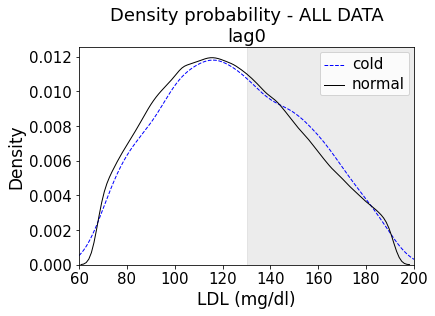

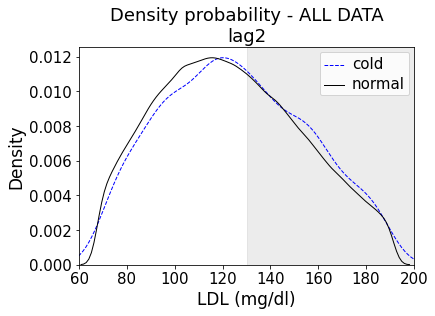

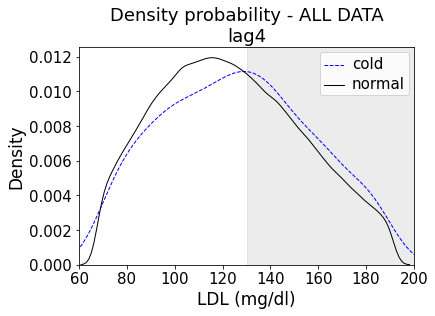

,LAG,Cold spell,Normal,Diff %,p_value,Sig.
0,0,42.38,40.17,2.22,0.005699,**
1,1,41.23,40.17,1.06,0.223848,-
2,2,42.76,40.17,2.59,0.001547,**
3,3,41.15,40.17,0.98,0.764419,-
4,4,44.76,40.17,4.59,0.003874,**
5,5,42.21,40.17,2.05,0.083296,-
6,6,40.36,40.17,0.19,0.864246,-
7,7,40.25,40.17,0.08,0.615661,-
8,8,41.24,40.17,1.08,0.301167,-
9,9,41.40,40.17,1.23,0.475953,-


In [44]:
# Graphs
#-------------------------------------------------------------------#
#                          Probability                              #
#-------------------------------------------------------------------#
lags = list(range( 0, 11, 1))
prob = pd.DataFrame()
lag = []
cold_spell = []
normal = []
sig =[]
mw = []
dif = []
for i in lags:     
    Cold_1 = pd.Series(df_shift['Result'][df_shift[f'CI_lag{i}']==1])
    Normal = pd.Series(df_shift['Result'][(df_shift['cwave']==0)&(df_shift['hwave']==0)&(df_shift['below_pct']==0)&(df_shift['above_pct']==0)])
    b = scipy.stats.mannwhitneyu(Cold_1,Normal,alternative='two-sided')[1]
    ax1 = sns.distplot(Cold_1,hist=False,kde=True,kde_kws = {'linewidth': 1}, label = 'cold',color='blue')
    x1 = ax1.get_lines()[0].get_data()[0] # Get the x data of the distribution
    y1 = ax1.get_lines()[0].get_data()[1] # Get the y data of the distribution
    [line.set_linestyle("--") for line in ax1.lines]
    ax2 = sns.distplot(Normal,hist=False,kde=True,kde_kws = {'linewidth': 1}, label = 'normal',color='black')
    x2 = ax2.get_lines()[1].get_data()[0] # Get the x data of the distribution
    y2 = ax2.get_lines()[1].get_data()[1] # Get the y data of the distribution
    
    '''
    Code for the probability calculus adapted from: https://stackoverflow.com/questions/52470172/how-to-get-possibility-distribution-function-from-python-seaborn-displot
    '''
    
    #Value to estimate for
    value = 130 #reference value
    value2 = 200 #x lim
    
    ecart = value2 - value
    idx1 = (np.abs(x1-value)).argmin()
    idx_1 = (np.abs(x1-(value+ecart))).argmin()
    
    idx2 = (np.abs(x2-value)).argmin()
    idx_2 = (np.abs(x2-(value+ecart))).argmin()
      
 
    cdf1 = scipy.integrate.cumtrapz(y1, x1, dx=1, initial=0)
    pr1 = cdf1[idx_1] - cdf1[idx1] 
    
    cdf2 = scipy.integrate.cumtrapz(y2, x2, dx=1, initial=0)
    pr2 = cdf2[idx_2] - cdf2[idx2] 
    
    plt.xlim(60,200)
    
    plt.xlabel('LDL (mg/dl)',fontsize=17)
    plt.ylabel('Density',fontsize = 17)
    plt.title(f'Density probability - ALL DATA\nlag{i}',fontsize=18)
    ax1.tick_params(labelsize=15)
    plt.setp(ax1.get_legend().get_texts(), fontsize='15')
    plt.axvspan(xmin=130.1, xmax=200,alpha = 0.15,color ='gray')
    if b<=0.05:
      plt.show()
    else:
      plt.close()

    lag.append(i)
    cold_spell.append("{:.2f}".format(pr1*100))
    normal.append("{:.2f}".format(pr2*100))
    dif.append(round((pr1-pr2)*100,2))
    if b<=0.01:
      sig.append('**')
    elif 0.01<b<=0.05:
      sig.append('*')
    else:
      sig.append('-')
    mw.append(b)

prob['LAG'] = lag
prob['Cold spell'] = cold_spell
prob['Normal'] = normal
prob['Diff %'] = dif
prob['p_value'] = mw
prob['Sig.'] = sig
prob


**Conclusion**: In the graphs and table above we can observe there is more people with ldl levels above reference value (shaded area) under cold spells than under control days, for lags 0, 2 and 4.

It means that since the beginning of the cold spell its effects on ldl levels can last for until 4 days. In other words, the cold spell effects in ldl levels start immediately and stops 5 days after its begins.

## **LDL cholesterol levels distribution: cold wave vs control days**
### *Stratified by age and sex*

Data were lagged from 0 to 10 days after the beginning of the cold spell

The presented graphs is only for affected groups.


Under 20 female: 41529
Under 20 male: 35392
Between 20 and 65 female: 352335
Between 20 and 65 female: 249457
Over 65 female: 115768
Over 65 male: 89765


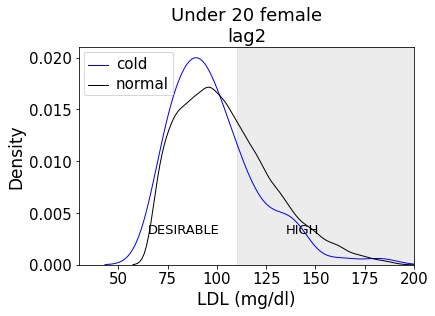

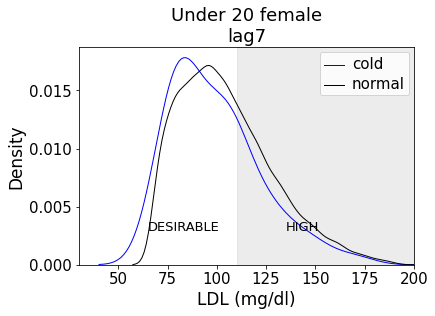

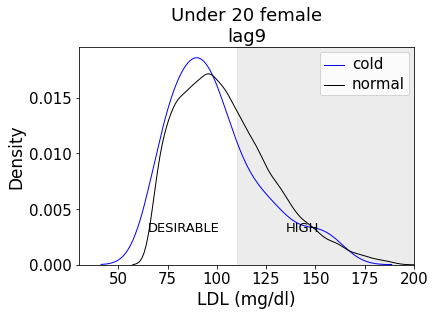

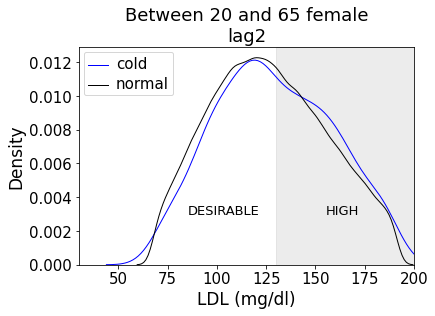

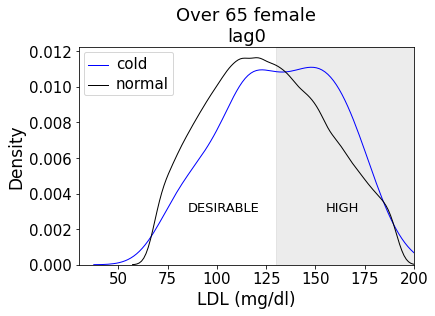

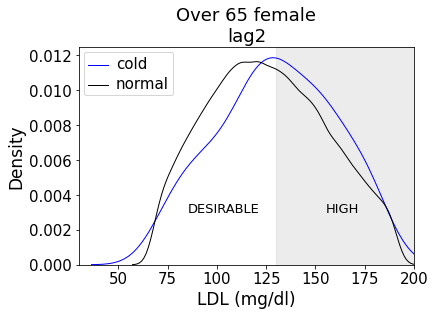

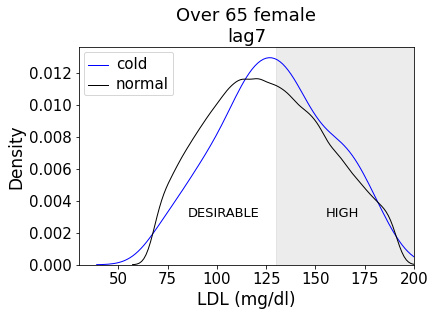

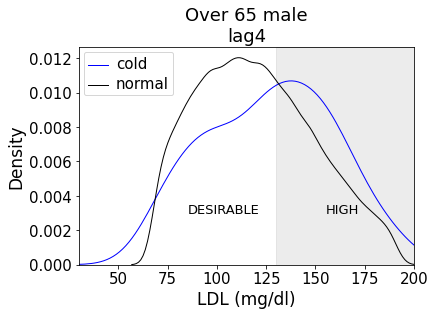

In [43]:

#-------------------------------------------------------------------#
#                          Probability - stratified                           #
#-------------------------------------------------------------------#

#create subsets
under_20_F = df_shift[(df_shift['Age'] < 20) & (df_shift['Sex']=="F")]
print("Under 20 female:",len(under_20_F))
under_20_M = df_shift[(df_shift['Age'] < 20) & (df_shift['Sex']=="M")]
print("Under 20 male:",len(under_20_M))
between_20_65_F = df_shift[(df_shift['Age'] >= 20) & (df_shift['Age'] < 65)  & (df_shift['Sex']=="F")]
print("Between 20 and 65 female:",len(between_20_65_F))
between_20_65_M = df_shift[(df_shift['Age'] >= 20) & (df_shift['Age'] < 65) & (df_shift['Sex']=="M")]   
print("Between 20 and 65 female:",len(between_20_65_M))
over_65_F = df_shift[(df_shift['Age'] > 64) & (df_shift['Sex']=="F")]   
print("Over 65 female:",len(over_65_F))
over_65_M = df_shift[(df_shift['Age'] > 64) & (df_shift['Sex']=="M")]   
print("Over 65 male:",len(over_65_M))                                                                                                                                        

dataframes = [under_20_F,under_20_M,between_20_65_F,between_20_65_M,over_65_F,over_65_M]
df_names = ["Under 20 female", "Under 20 male", "Between 20 and 65 female", "Between 20 and 65 male","Over 65 female", "Over 65 male"]    

lags = list(range( 0, 11, 1))
prob = pd.DataFrame()
subset = []
lag = []
cold_spell = []
cold_n = []
normal = []
normal_n = []
dif = []
mw = []
sig = []
for j in range(len(dataframes)):
  for i in lags:     
    Cold_1 = pd.Series(dataframes[j]['Result'][dataframes[j][f'CI_lag{i}']==1])
    Normal = pd.Series(dataframes[j]['Result'][(dataframes[j]['cwave']==0)&(dataframes[j]['hwave']==0)&(dataframes[j]['below_pct']==0)&(dataframes[j]['above_pct']==0)])
    b = scipy.stats.mannwhitneyu(Cold_1,Normal,alternative='two-sided')[1]
    cold_n.append(len(Cold_1))
    normal_n.append(len(Normal))
    ax1 = sns.distplot(Cold_1,hist=False,kde=True,kde_kws = {'linewidth': 1}, label = 'cold',color='blue')
    x1 = ax1.get_lines()[0].get_data()[0] # Get the x data of the distribution
    y1 = ax1.get_lines()[0].get_data()[1] # Get the y data of the distribution
    
    ax2 = sns.distplot(Normal,hist=False,kde=True,kde_kws = {'linewidth': 1}, label = 'normal',color='black')
    x2 = ax2.get_lines()[1].get_data()[0] # Get the x data of the distribution
    y2 = ax2.get_lines()[1].get_data()[1] # Get the y data of the distribution
    
    '''
    Code for the probability calculus adapted from: https://stackoverflow.com/questions/52470172/how-to-get-possibility-distribution-function-from-python-seaborn-displot
    '''
    #ref value 
    if dataframes[j]['Age'].mean()<=20:
      value = 110

    else:
      value = 130


    #Value to estimate for
    value2 = 200 #x lim
    
    ecart = value2 - value
    idx1 = (np.abs(x1-value)).argmin()
    idx_1 = (np.abs(x1-(value+ecart))).argmin()
    
    idx2 = (np.abs(x2-value)).argmin()
    idx_2 = (np.abs(x2-(value+ecart))).argmin()
      
    import scipy
    cdf1 = scipy.integrate.cumtrapz(y1, x1, dx=1, initial=0)
    pr1 = cdf1[idx_1] - cdf1[idx1] 
    
    cdf2 = scipy.integrate.cumtrapz(y2, x2, dx=1, initial=0)
    pr2 = cdf2[idx_2] - cdf2[idx2] 
    
    plt.xlim(30,200)
    plt.xlabel('LDL (mg/dl)',fontsize=17)
    plt.ylabel('Density',fontsize = 17)
    plt.title(f'{df_names[j]}\nlag{i}',fontsize=18)
    ax1.tick_params(labelsize=15)
    plt.setp(ax1.get_legend().get_texts(), fontsize='15')
    plt.text(value-45,0.003,'DESIRABLE',fontsize = 13) # text
    plt.text(value+25,0.003,'HIGH',fontsize = 13)
    plt.axvspan(xmin=(value+0.1), xmax=200,alpha = 0.15,color ='gray')
   
    if b<=0.05:
      plt.show()
    else:
      plt.close()
    
  
    
    subset.append(f'{df_names[j]}')
    lag.append(i)
    cold_spell.append("{:.2f}".format(pr1*100))
    normal.append("{:.2f}".format(pr2*100))
    dif.append(round((pr1-pr2)*100,2))
    mw.append(round(b,3))

    if b<=0.01:
      sig.append('**')
    elif 0.01<b<=0.05:
      sig.append('*')
    else:
      sig.append('-')
    
    

prob['SUBSET'] = subset
prob['lg'] = lag
prob['Cold'] = cold_spell
prob['n1'] = cold_n
prob['Nor.'] = normal
prob['n2'] = normal_n
prob['Diff'] = dif
prob['p'] = mw
prob['Sig.'] = sig

## **Difference between people percentage with LDL above reference value**
## Cold spell days vs control days

#### Table columns:
* **SUBSET:** Subset name
* **lg:** Days after cold spell beginning
* **Cold:** Percentage of people with ldl level above reference value under cold spell days
* **n1:** Number of ldl tests under cold spell days
* **Nor:** Percentage of people with ldl level above reference value under control days
* **n2:** Number of ldl tests under control days
* **Diff:** Difference bewteen percentages (cold - control)
* **p:** P value of Mann-Whitney U test between exams under cold spell and control days
* **Sig.:** 
  * "-" = non significant
  * "*" = p value <0.05
  * "**" = p value <0.01


In [40]:
#@title Cold vs Control days summary table
diff_max = prob[prob['p']<0.05].sort_values(by=['SUBSET','lg'],ascending=True)
diff_min = prob[prob['p']>0.05].sort_values(by=['SUBSET','lg'],ascending=True)

print('Groups who were affected by cold spell and when\nOrdered by SUBSET and lag(ascending)\n')
print(diff_max)
diff_max

#subsetting only groups that suffered cold spell effects
print('\n\nGroups who were NOT affected by cold spell and when\nOrdered by SUBSET and lag(ascending)\n')
print(diff_min[(diff_min['SUBSET']== 'Over 65 male')|(diff_min['SUBSET']== 'Over 65 female')|(diff_min['SUBSET']== 'Between 20 and 65 female')])


Groups who were affected by cold spell and when
Ordered by SUBSET and lag(ascending)

                      SUBSET  lg   Cold   n1   Nor.      n2   Diff      p Sig.
24  Between 20 and 65 female   2  46.88  879  43.56  157878   3.32  0.004   **
44            Over 65 female   0  52.76  253  43.49   52007   9.27  0.000   **
46            Over 65 female   2  50.89  228  43.49   52007   7.39  0.016    *
51            Over 65 female   7  47.55  290  43.49   52007   4.06  0.026    *
59              Over 65 male   4  47.26   87  35.81   40448  11.45  0.025    *
2            Under 20 female   2  25.58   83  37.00   18771 -11.42  0.017    *
7            Under 20 female   7  29.57  106  37.00   18771  -7.43  0.012    *
9            Under 20 female   9  28.82   99  37.00   18771  -8.17  0.021    *


Groups who were NOT affected by cold spell and when
Ordered by SUBSET and lag(ascending)

                      SUBSET  lg   Cold    n1   Nor.      n2  Diff      p Sig.
22  Between 20 and 65 female   0


**Conclusion about the table:**
 If we consider significance level under p < 0.05, there is 4 groups affected by cold spell: 
 * **Under 20 female**
 * **Over 65 male**
 * **Over 65 female**
 * **Between 20 and 65 female**
 
But, the first and youngest group shows negative *Diff*, indicating cold spells lower their ldl levels.

Unregarding results with negative *Diff* we have 3 groups affected: 
* **Over 65 male**: effects begins 4 days after cold spell begins and stops 5 days after 
* **Over 65 female**: effects begins the same day cold spell begins and stops 8 days after
* **Between 20 and 65 female**: effects begins 2 days after cold spell beginning and stops 3 days after